In [14]:
%load_ext autoreload
%autoreload 2
import datetime
import os
import pandas as pd
print(datetime.datetime.now())

#dir(pygentoolbox.Tools)
%matplotlib inline
import matplotlib.pyplot as plt
from pygentoolbox.IRS_v2 import main

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2019-09-27 13:05:25.321746


In [15]:
# i ran the TrimSam_TrimGff3 notebook before this to limit IES features and sam aligned sequences to scaffold51_1
# 588 features
gff3file = 'D:\\LinuxShare\\Ciliates\\Genomes\\Annotations\\internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
# 1008727 sequences
samfilelist_mac = ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\Mac\\DCL23_KD_ERX466736_SRA.fastq.trim.sam', ]
# 1029507 sequences
samfilelist_mac_ies = ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\MacAndIES\\DCL23_KD_ERX466736_SRA.fastq.trim.sam']

main(gff3file, samfilelist_mac, samfilelist_mac_ies, numreads=15000000, features=['internal_eliminated_sequence'], CIGARstring=False)

print(datetime.datetime.now())

Reading Gff3 file: D:\LinuxShare\Ciliates\Genomes\Annotations\internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Number of scaffolds: 511
['scaffold51_100', 'scaffold51_101', 'scaffold51_102', 'scaffold51_103', 'scaffold51_104', 'scaffold51_105', 'scaffold51_106', 'scaffold51_107', 'scaffold51_108', 'scaffold51_109']
Reading, sub-sampling, trim by CIGAR, only coordinates,  for sam file: D:\LinuxShare\Projects\SRA\DCL23_KD_DNA\Mac\DCL23_KD_ERX466736_SRA.fastq.trim.sam
Number of scaffolds: 697
['*', 'scaffold51_91', 'scaffold51_108', 'scaffold51_95', 'scaffold51_37', 'scaffold51_130', 'scaffold51_160', 'scaffold51_11', 'scaffold51_51', 'scaffold51_75']
Desired Number of reads: 15000000
Number of sub-sampled reads = 3530147
Reading, sub-sampling, trim by CIGAR, only coordinates,  for sam file: D:\LinuxShare\Projects\SRA\DCL23_KD_DNA\MacAndIES\DCL23_KD_ERX466736_SRA.fastq.trim.sam
Number of scaffolds: 697
['*', 'scaffold51_91', 'scaffold51_108', 'scaffold51_95', 'scaffold51_37', 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

import datetime
print(datetime.datetime.now())

2019-10-23 13:07:44.256747


In [2]:
filelist =    ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\Mac\\DCL23_KD_ERX466736_SRA.fastq.trim.IRS.tsv', \
              ]
filelist2 =   ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\Mac\\DCL23_KD_ERX466736_SRA.fastq.trim.IRS.Alternative.tsv', \
              ]
limit = 0
numbins = 50
IRS = []
fileprefixes = []
for f in filelist:
    with open(f, 'r') as FILE:
        # int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) >= limit
        # this sums the left boundary, right boundary sequences when IES is present (reads aligned to Mac+IES genome)
        # int(line.strip().split('\t')[5]) >= limit
        # this sees if the reads overlapping the IES feature (when IES has been removed) is greater than or equal to limit (Mac genome)
        data = [float(line.strip().split('\t')[1]) for line in FILE if (int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) >= limit) or (int(line.strip().split('\t')[5]) >= limit) ]
        IRS = IRS + data
    print('#####  For file: %s #####' % f)
    print('%d IES elements with counts greater than %d' % (len(data), limit))
    print('%d IES elements with IRS less than 0.1' % len([i for i in data if i < 0.1]))
    print('%d IES elements with IRS greater than 0.1 and less than 0.25' % len([i for i in data if (i > 0.1) and (i < 0.25)]))
    print('%d IES elements with IRS above 0.25 and less than 0.75' % len([i for i in data if (i < 0.75) and (i > 0.25)]))
    print('%d IES elements with IRS greater than 0.75' % len([i for i in data if i > 0.75]))
    path, file = os.path.split(f)
    print(file)
    fileprefixes = fileprefixes + [file.split('.')[0]]*len(data)
    outpath = os.path.join(path, '%s.hist.pdf' % file.split('.')[0])
    plt.hist(data, bins = numbins)
    plt.title('%s IRS Histogram' % file.split('.')[0])
    plt.xlabel('IRS')
    plt.ylabel('Frequency')
    plt.savefig(outpath)
    plt.show()
    plt.close()

IRS2 = []
fileprefixes2 = []
for f in filelist2:
    with open(f, 'r') as FILE:
        # int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) + int(line.strip().split('\t')[4]) >= limit
        # this sums the left boundary, right boundary, and both boundary sequences when IES is present (reads aligned to Mac+IES genome)
        # int(line.strip().split('\t')[5]) >= limit
        # this sees if the reads overlapping the IES feature (when IES has been removed) is greater than or equal to limit (Mac genome)
        data2 = [float(line.strip().split('\t')[1]) for line in FILE if (int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) + int(line.strip().split('\t')[4]) >= limit) or (int(line.strip().split('\t')[5]) >= limit) ]
        IRS2 = IRS2 + data2
    print('#####  For file: %s #####' % f)
    print('%d IES elements with counts greater than %d' % (len(data2), limit))
    print('%d IES elements with IRS less than 0.1' % len([i for i in data2 if i < 0.1]))
    print('%d IES elements with IRS greater than 0.1 and less than 0.25' % len([i for i in data2 if (i > 0.1) and (i < 0.25)]))
    print('%d IES elements with IRS above 0.25 and less than 0.75' % len([i for i in data2 if (i < 0.75) and (i > 0.25)]))
    print('%d IES elements with IRS greater than 0.75' % len([i for i in data2 if i > 0.75]))
    path2, file2 = os.path.split(f)
    fileprefixes2 = fileprefixes2 + [file2.split('.')[0]]*len(data2)
    outpath = os.path.join(path2, '%s.Alt.hist.pdf' % file2.split('.')[0])
    plt.hist(data2, bins = numbins)
    plt.title('%s IRS Alternative Histogram' % file2.split('.')[0])
    plt.xlabel('IRS Alternative')
    plt.ylabel('Frequency')
    plt.savefig(outpath)
    plt.show()
    plt.close()

print(set(fileprefixes))
print(set(fileprefixes2))
print(len(IRS))
print(len(fileprefixes))
# make strip charts
IRS_df = pd.DataFrame(list(zip(IRS, fileprefixes)), columns=['IRS', 'FilePrefix'])
IRSAlt_df = pd.DataFrame(list(zip(IRS2, fileprefixes2)), columns=['IRSAlt', 'FilePrefix'])

print(IRS_df.FilePrefix.unique())
print(IRSAlt_df.FilePrefix.unique())

outpath = os.path.join(path, '.IRS.pdf')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(x='FilePrefix', y='IRS', data=IRS_df, jitter=True, size=1)
plt.savefig(outpath)
plt.show()
plt.close()

sns.set(rc={'figure.figsize':(11.7,8.27)})
outpath = os.path.join(path2, '.IRSAlt.pdf')
sns.stripplot(x='FilePrefix', y='IRSAlt', data=IRSAlt_df, jitter=True, size=1)
plt.savefig(outpath)
plt.show()
plt.close()
print(datetime.datetime.now())

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\Mac\\DCL23_KD_ERX466736_SRA.fastq.trim.IRS.tsv'

In [18]:
# i ran the TrimSam_TrimGff3 notebook before this to limit IES features and sam aligned sequences to scaffold51_1
# 588 features
gff3file = 'D:\\LinuxShare\\Ciliates\\Genomes\\Annotations\\internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3'
# 1008727 sequences
samfilelist_mac = ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\Mac\\DCL23_KD_ERX466736_SRA.fastq.trim.sam', ]
# 1029507 sequences
samfilelist_mac_ies = ['D:\\LinuxShare\\Projects\\SRA\\DCL23_KD_DNA\\MacAndIES\\DCL23_KD_ERX466736_SRA.fastq.trim.sam']

main(gff3file, samfilelist_mac, samfilelist_mac_ies, numreads=15000000, features=['internal_eliminated_sequence'], CIGARstring=True)

print(datetime.datetime.now())

Reading Gff3 file: D:\LinuxShare\Ciliates\Genomes\Annotations\internal_eliminated_sequence_PGM_ParTIES.pt_51_with_ies.gff3
Number of scaffolds: 511
['scaffold51_100', 'scaffold51_101', 'scaffold51_102', 'scaffold51_103', 'scaffold51_104', 'scaffold51_105', 'scaffold51_106', 'scaffold51_107', 'scaffold51_108', 'scaffold51_109']
Reading, sub-sampling, trim by CIGAR, only coordinates,  for sam file: D:\LinuxShare\Projects\SRA\DCL23_KD_DNA\Mac\DCL23_KD_ERX466736_SRA.fastq.trim.sam
Number of scaffolds: 696
['scaffold51_91', 'scaffold51_108', 'scaffold51_95', 'scaffold51_37', 'scaffold51_130', 'scaffold51_160', 'scaffold51_11', 'scaffold51_51', 'scaffold51_75', 'scaffold51_205']
Desired Number of reads: 15000000
Number of sub-sampled reads = 3210075
Reading, sub-sampling, trim by CIGAR, only coordinates,  for sam file: D:\LinuxShare\Projects\SRA\DCL23_KD_DNA\MacAndIES\DCL23_KD_ERX466736_SRA.fastq.trim.sam
Number of scaffolds: 696
['scaffold51_91', 'scaffold51_108', 'scaffold51_95', 'scaffold

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd

import datetime
print(datetime.datetime.now())

2019-10-23 13:09:46.585517


#####  For file: D:\LinuxShare\Projects\SRA\PRJEB6288_EZL1_DCL\003_DCL23_KD_DNA\Mac\DCL23_ERR501379_12.fastq.trim.IRS.tsv #####
26475 IES elements with counts greater than 20
24705 IES elements with IRS less than 0.1
1267 IES elements with IRS greater than 0.1 and less than 0.25
71 IES elements with IRS above 0.25 and less than 0.75
62 IES elements with IRS greater than 0.75
DCL23_ERR501379_12.fastq.trim.IRS.tsv


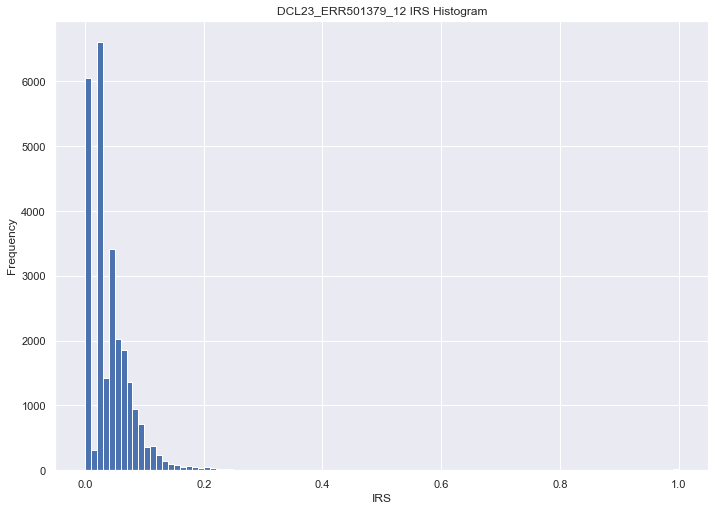

#####  For file: D:\LinuxShare\Projects\SRA\PRJEB6288_EZL1_DCL\003_DCL23_KD_DNA\Mac\DCL23_ERR501379_12.fastq.trim.IRS.Alternative.tsv #####
26522 IES elements with counts greater than 20
18345 IES elements with IRS less than 0.1
6620 IES elements with IRS greater than 0.1 and less than 0.25
621 IES elements with IRS above 0.25 and less than 0.75
121 IES elements with IRS greater than 0.75


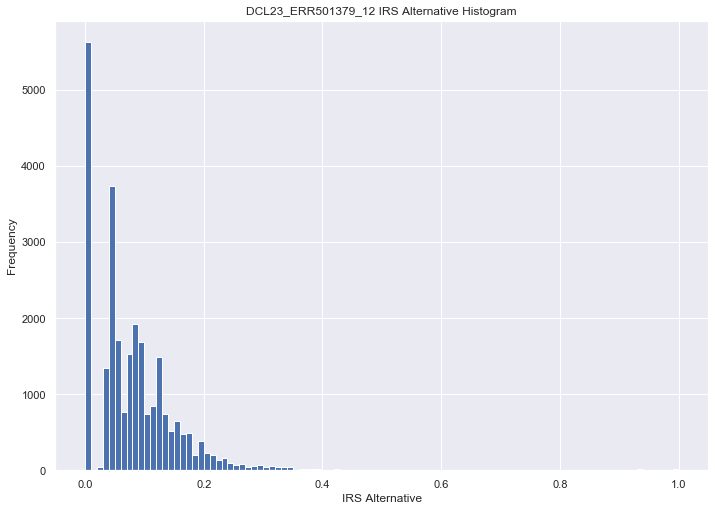

{'DCL23_ERR501379_12'}
{'DCL23_ERR501379_12'}
26475
26475
['DCL23_ERR501379_12']
['DCL23_ERR501379_12']


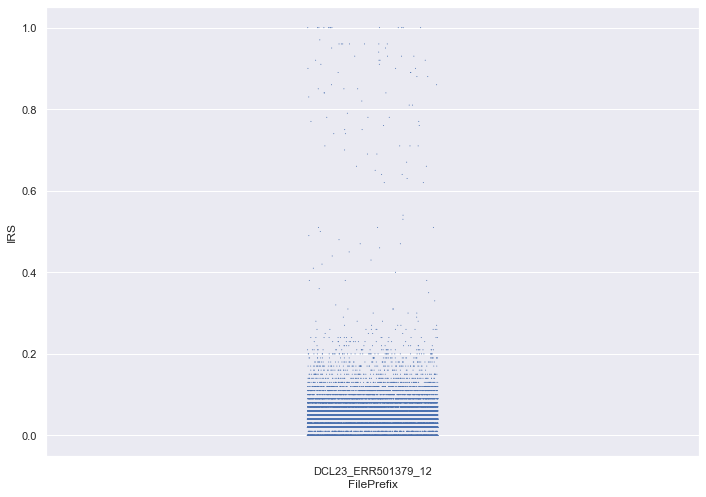

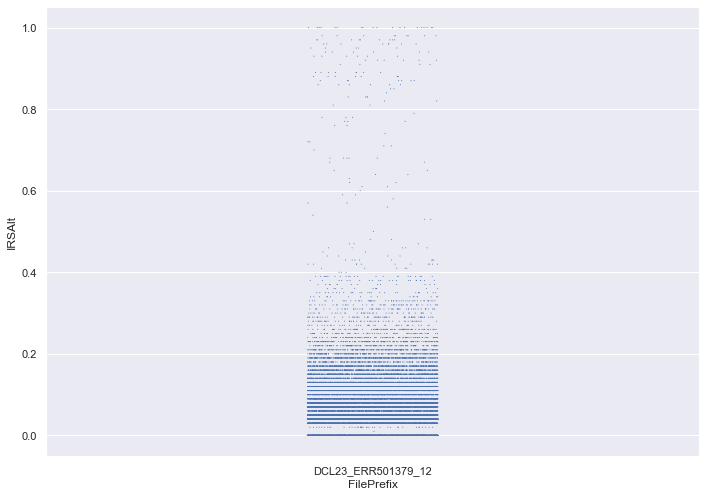

2019-10-23 13:12:00.076760


In [6]:
filelist =    ['D:\\LinuxShare\\Projects\\SRA\\PRJEB6288_EZL1_DCL\\003_DCL23_KD_DNA\\Mac\\DCL23_ERR501379_12.fastq.trim.IRS.tsv', \
              ]
filelist2 =   ['D:\\LinuxShare\\Projects\\SRA\\PRJEB6288_EZL1_DCL\\003_DCL23_KD_DNA\\Mac\\DCL23_ERR501379_12.fastq.trim.IRS.Alternative.tsv', \
              ]
limit = 20
IRS = []
fileprefixes = []
for f in filelist:
    with open(f, 'r') as FILE:
        # int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) >= limit
        # this sums the left boundary, right boundary sequences when IES is present (reads aligned to Mac+IES genome)
        # int(line.strip().split('\t')[5]) >= limit
        # this sees if the reads overlapping the IES feature (when IES has been removed) is greater than or equal to limit (Mac genome)
        data = [float(line.strip().split('\t')[1]) for line in FILE if (int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) >= limit) or (int(line.strip().split('\t')[5]) >= limit) ]
        IRS = IRS + data
    print('#####  For file: %s #####' % f)
    print('%d IES elements with counts greater than %d' % (len(data), limit))
    print('%d IES elements with IRS less than 0.1' % len([i for i in data if i < 0.1]))
    print('%d IES elements with IRS greater than 0.1 and less than 0.25' % len([i for i in data if (i > 0.1) and (i < 0.25)]))
    print('%d IES elements with IRS above 0.25 and less than 0.75' % len([i for i in data if (i < 0.75) and (i > 0.25)]))
    print('%d IES elements with IRS greater than 0.75' % len([i for i in data if i > 0.75]))
    path, file = os.path.split(f)
    print(file)
    fileprefixes = fileprefixes + [file.split('.')[0]]*len(data)
    outpath = os.path.join(path, '%s.hist.pdf' % file.split('.')[0])
    plt.hist(data, bins = 100)
    plt.title('%s IRS Histogram' % file.split('.')[0])
    plt.xlabel('IRS')
    plt.ylabel('Frequency')
    plt.savefig(outpath)
    plt.show()
    plt.close()

IRS2 = []
fileprefixes2 = []
for f in filelist2:
    with open(f, 'r') as FILE:
        # int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) + int(line.strip().split('\t')[4]) >= limit
        # this sums the left boundary, right boundary, and both boundary sequences when IES is present (reads aligned to Mac+IES genome)
        # int(line.strip().split('\t')[5]) >= limit
        # this sees if the reads overlapping the IES feature (when IES has been removed) is greater than or equal to limit (Mac genome)
        data2 = [float(line.strip().split('\t')[1]) for line in FILE if (int(line.strip().split('\t')[2]) + int(line.strip().split('\t')[3]) + int(line.strip().split('\t')[4]) >= limit) or (int(line.strip().split('\t')[5]) >= limit) ]
        IRS2 = IRS2 + data2
    print('#####  For file: %s #####' % f)
    print('%d IES elements with counts greater than %d' % (len(data2), limit))
    print('%d IES elements with IRS less than 0.1' % len([i for i in data2 if i < 0.1]))
    print('%d IES elements with IRS greater than 0.1 and less than 0.25' % len([i for i in data2 if (i > 0.1) and (i < 0.25)]))
    print('%d IES elements with IRS above 0.25 and less than 0.75' % len([i for i in data2 if (i < 0.75) and (i > 0.25)]))
    print('%d IES elements with IRS greater than 0.75' % len([i for i in data2 if i > 0.75]))
    path2, file2 = os.path.split(f)
    fileprefixes2 = fileprefixes2 + [file2.split('.')[0]]*len(data2)
    outpath = os.path.join(path2, '%s.Alt.hist.pdf' % file2.split('.')[0])
    plt.hist(data2, bins = 100)
    plt.title('%s IRS Alternative Histogram' % file2.split('.')[0])
    plt.xlabel('IRS Alternative')
    plt.ylabel('Frequency')
    plt.savefig(outpath)
    plt.show()
    plt.close()

print(set(fileprefixes))
print(set(fileprefixes2))
print(len(IRS))
print(len(fileprefixes))
# make strip charts
IRS_df = pd.DataFrame(list(zip(IRS, fileprefixes)), columns=['IRS', 'FilePrefix'])
IRSAlt_df = pd.DataFrame(list(zip(IRS2, fileprefixes2)), columns=['IRSAlt', 'FilePrefix'])

print(IRS_df.FilePrefix.unique())
print(IRSAlt_df.FilePrefix.unique())

outpath = os.path.join(path, '.IRS.pdf')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.stripplot(x='FilePrefix', y='IRS', data=IRS_df, jitter=True, size=1)
plt.savefig(outpath)
plt.show()
plt.close()

sns.set(rc={'figure.figsize':(11.7,8.27)})
outpath = os.path.join(path2, '.IRSAlt.pdf')
sns.stripplot(x='FilePrefix', y='IRSAlt', data=IRSAlt_df, jitter=True, size=1)
plt.savefig(outpath)
plt.show()
plt.close()
print(datetime.datetime.now())